Importing car sales csv file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Carsales.csv to Carsales.csv


In [6]:
import pandas as pd

# Read the CSV file into a DataFrame
Carsales = pd.read_csv('Carsales.csv')

Identify the variable types in the given data set.

**Categorical Variables:**

Manufacturer
Model
Vehicle_type
Latest_launch

**Numerical Variables:**

Sales_in_thousands (Continuous)
year_resale_value (Continuous)
Price_in_thousands (Continuous)
Engine_size (Continuous)
Horsepower (Continuous)
Wheelbase (Continuous)
Width (Width of the car, likely continuous)
Length (Length of the car, likely continuous)
Curb_weight (Weight of the vehicle without passengers or cargo, likely continuous)
Fuel_capacity (Capacity of the fuel tank, likely continuous)
Fuel_efficiency (Efficiency in fuel consumption, likely continuous)
Power_per_factor (Unknown; possibly a derived or calculated variable, likely continuous)

In [15]:
import pandas as pd

# Assuming 'Carsales' is your DataFrame

# Use describe() to get statistical summaries for numerical columns
numerical_summary = Carsales.describe()

# Identify categorical variables by checking data types or unique values
categorical_columns = []
for column in Carsales.columns:
    if Carsales[column].dtype == 'object':  # Check if the column contains object/string data type
        categorical_columns.append(column)

# Display results
print("Statistical summary for numerical columns:")
print(numerical_summary)

print("\nCategorical columns:")
print(categorical_columns)


Statistical summary for numerical columns:
       Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count          157.000000           121.000000          155.000000   
mean            52.998076            18.072975           27.390755   
std             68.029422            11.453384           14.351653   
min              0.110000             5.160000            9.235000   
25%             14.114000            11.260000           18.017500   
50%             29.450000            14.180000           22.799000   
75%             67.956000            19.875000           31.947500   
max            540.561000            67.550000           85.500000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   156.000000  156.000000  156.000000  156.000000  156.000000   
mean      3.060897  185.948718  107.487179   71.150000  187.343590   
std       1.044653   56.700321    7.641303    3.451872   13.431754   
min       1.000000   55.000000   92.600000   6

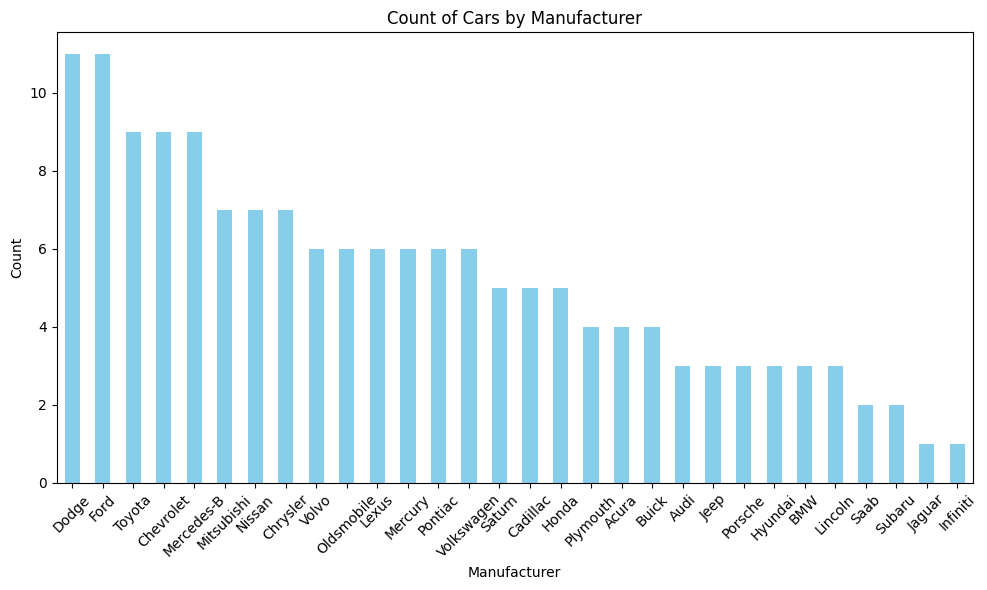

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#read the CSV file into a DataFrame
Carsales = pd.read_csv('Carsales.csv')

#create a bar chart of the number of cars sold by each manufacturer
manufacturer_counts = Carsales['Manufacturer'].value_counts()
plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='bar', color='skyblue')

#add a title, x-axis label, and y-axis label to the chart
plt.title('Count of Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')

#rotate the x-axis labels so that they are readable
plt.xticks(rotation=45)

#tighten the layout of the chart
plt.tight_layout()

#show the chart
plt.show()

Make a bar graph for manufacturer type

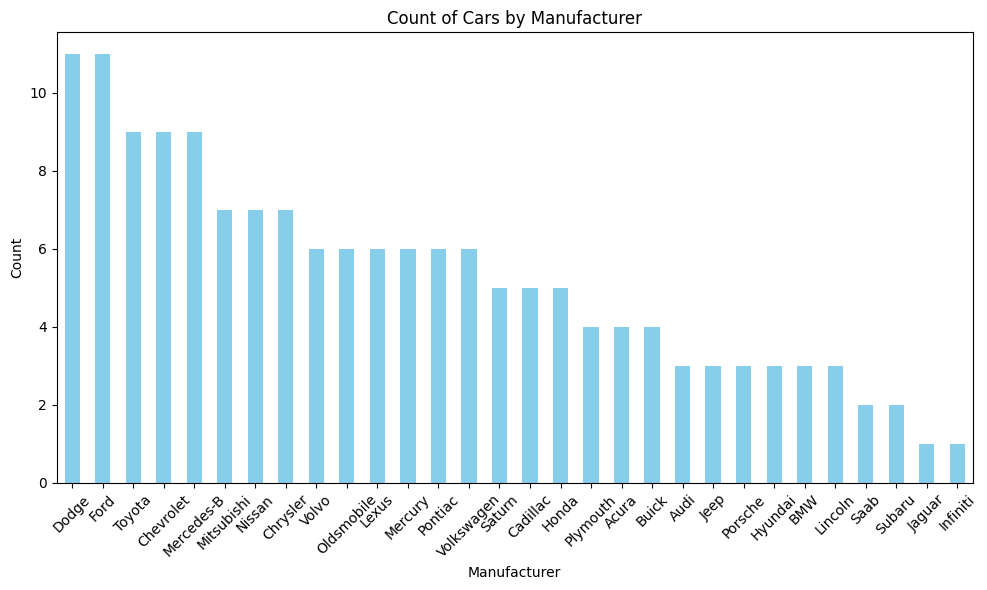

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

manufacturer_counts = Carsales['Manufacturer'].value_counts()

plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='bar', color='skyblue')

plt.title('Count of Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Make a pie chart for showing vehicle type by percentage

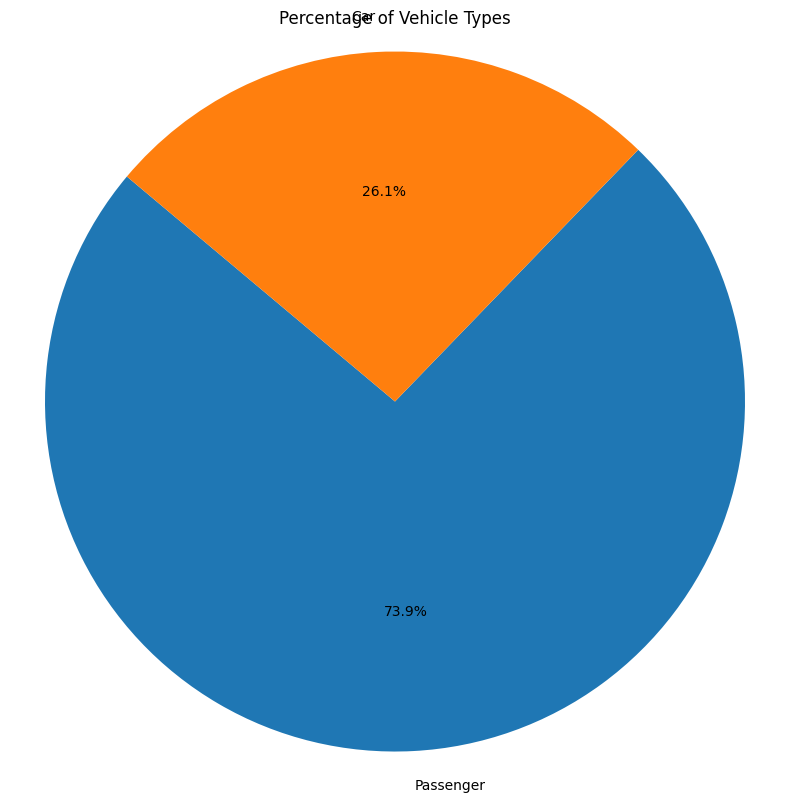

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


vehicle_type_counts = Carsales ['Vehicle_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Vehicle Types')

plt.axis('equal')  #Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

plt.show()


Calculate average Price of all cars by using correct measure of central Tendency

In [12]:
import pandas as pd

average_price = Carsales['Price_in_thousands'].mean()

print(f"The average price of all cars is: ${average_price:.2f} thousand")


The average price of all cars is: $27.39 thousand


Calculate the variance and standard deviation for numerical columns such as
Sales_in_thousands, __year_resale_value, Price_in_thousands, Engine_size, Horsepower

In [18]:
import pandas as pd

# Assuming 'Carsales' is your DataFrame

# Selecting specific numerical columns
numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

# Calculating variance for selected columns
variance = Carsales[numerical_columns].var()

# Calculating standard deviation for selected columns
std_deviation = Carsales[numerical_columns].std()

# Displaying results
print("Variance for selected numerical columns:")
print(variance)
print("\nStandard deviation for selected numerical columns:")
print(std_deviation)


Variance for selected numerical columns:
Sales_in_thousands     4628.002257
__year_resale_value     131.180007
Price_in_thousands      205.969949
Engine_size               1.091300
Horsepower             3214.926385
dtype: float64

Standard deviation for selected numerical columns:
Sales_in_thousands     68.029422
__year_resale_value    11.453384
Price_in_thousands     14.351653
Engine_size             1.044653
Horsepower             56.700321
dtype: float64


For the same columns Calculate IQR and identify outliers in these columns

In [19]:
import pandas as pd

# Selecting specific numerical columns
numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

# Loop through each column to calculate IQR and identify outliers
for column in numerical_columns:
    Q1 = Carsales[column].quantile(0.25)
    Q3 = Carsales[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifying outliers for the current column
    outliers = Carsales[(Carsales[column] < Q1 - 1.5 * IQR) | (Carsales[column] > Q3 + 1.5 * IQR)]

    # Displaying results for each column
    print(f"Column: {column}")
    print(f"IQR: {IQR}")
    print(f"Identified outliers:")
    print(outliers)
    print("\n")


Column: Sales_in_thousands
IQR: 53.842
Identified outliers:
    Manufacturer           Model  Sales_in_thousands  __year_resale_value  \
40         Dodge      Ram Pickup             227.061               15.060   
45         Dodge         Caravan             181.749               12.025   
49          Ford          Taurus             245.815               10.055   
50          Ford           Focus             175.670                  NaN   
52          Ford        Explorer             276.747               16.640   
53          Ford        Windstar             155.787               13.175   
55          Ford          Ranger             220.650                7.850   
56          Ford        F-Series             540.561               15.075   
57         Honda           Civic             199.685                9.850   
58         Honda          Accord             230.902               13.210   
69          Jeep  Grand Cherokee             157.040               18.810   
137       Toyota

Make Histograms for all Numerical columns and identify the distribution of type by calculating
skewness;
Note : If the skewness is 0, it indicates a perfectly symmetrical distribution.
If the skewness is negative, it means the distribution is skewed to the left (long left tail).
If the skewness is positive, it means the distribution is skewed to the right (long right tail).

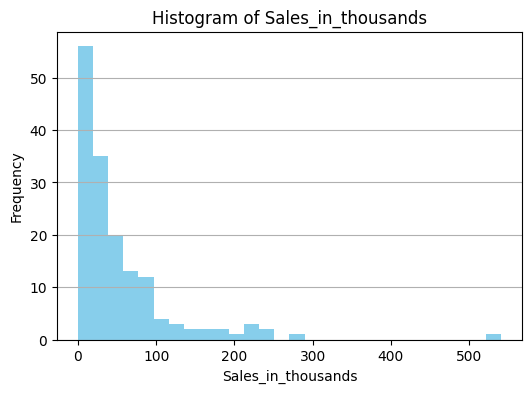

Skewness for Sales_in_thousands: 3.375866090661253
The distribution is skewed to the right (long right tail).




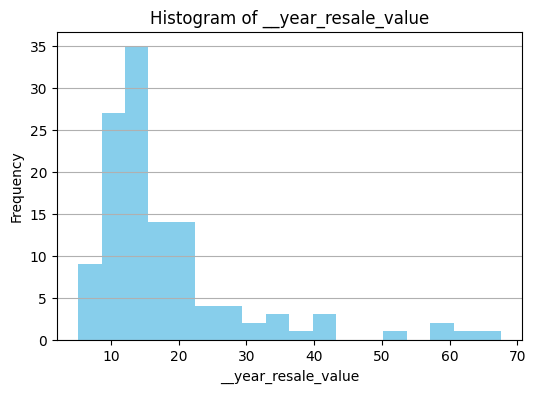

Skewness for __year_resale_value: nan
The distribution is skewed to the left (long left tail).




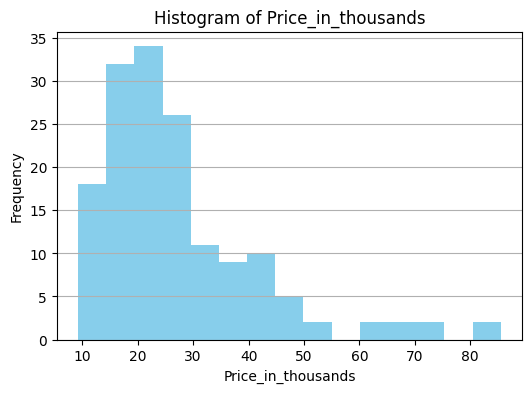

Skewness for Price_in_thousands: nan
The distribution is skewed to the left (long left tail).




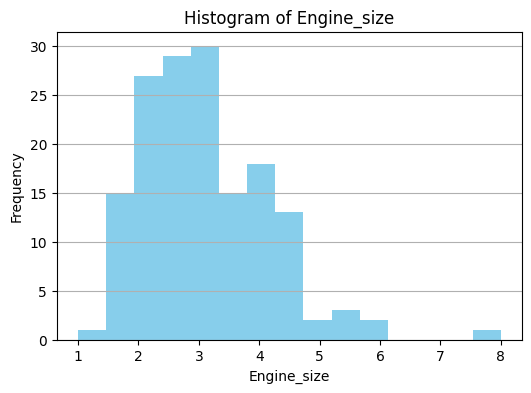

Skewness for Engine_size: nan
The distribution is skewed to the left (long left tail).




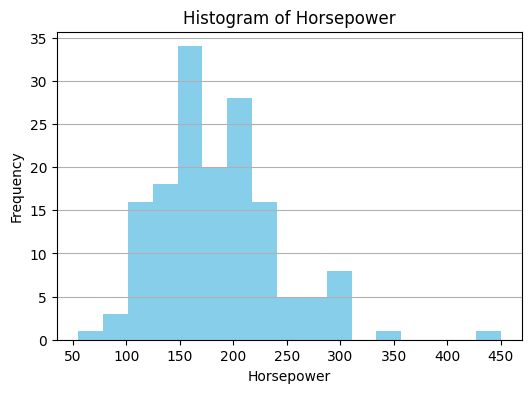

Skewness for Horsepower: nan
The distribution is skewed to the left (long left tail).




In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew


#Selecting numerical columns
numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

#Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(Carsales[column], bins='auto', color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

    #Calculate skewness for the current column
    skewness = skew(Carsales[column])
    print(f"Skewness for {column}: {skewness}")
    if skewness == 0:
        print("The distribution is perfectly symmetrical.")
    elif skewness > 0:
        print("The distribution is skewed to the right (long right tail).")
    else:
        print("The distribution is skewed to the left (long left tail).")
    print("\n")
